In [33]:
import pandas as pd
df_FIBA = pd.read_csv("FIBA_Play_Counts.csv", encoding='latin-1')
df_FIBA.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_FIBA['Source'] = 'FIBA'
df_FIBA.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Ricky Rubio,284,121,64,20,0,0,9,25,7,16,546,FIBA
1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
3,Juancho Hernangomez,2,53,25,5,5,8,26,35,13,1,173,FIBA
4,Pierre Oriola,0,21,10,0,3,8,18,38,1,1,100,FIBA


In [34]:
df_INTL = pd.read_csv("INTL_Play_Counts.csv", encoding='latin-1')
df_INTL.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_INTL['Source'] = 'INTL'
df_INTL.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Jerome Randle,2780,417,638,633,0,1,67,99,107,173,4915,INTL
1,Elmedin Kikanovic,9,277,173,29,986,761,519,424,21,5,3204,INTL
2,Rickey Paulding,848,925,382,353,282,12,231,265,378,62,3738,INTL
3,Casper Ware,2059,471,430,637,4,1,48,76,166,185,4077,INTL
4,Daniel Johnson,32,474,373,84,853,348,331,399,43,25,2962,INTL


In [35]:
df = pd.concat([df_FIBA, df_INTL]).reset_index()
s = df['Player'].value_counts()
df[df['Player'].isin(s[s>=2].index)]

,index,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
1,1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
3,3,Juancho Hernangomez,2,53,25,5,5,8,26,35,13,1,173,FIBA
4,4,Pierre Oriola,0,21,10,0,3,8,18,38,1,1,100,FIBA
5,5,Facundo Campazzo,595,74,140,70,0,2,9,24,16,29,959,FIBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,3993,Denis Lukashov,17,11,3,8,0,0,2,2,3,1,47,INTL
6888,4015,Robert Rothbart,0,6,1,1,13,8,5,8,0,0,42,INTL
6968,4095,Gary Forbes,2,9,5,4,5,0,0,3,3,0,31,INTL
6975,4102,Vitaliy Lapchenko,0,10,2,0,0,6,4,8,0,0,30,INTL


In [36]:
play_types = ['P&R Ball Handler', 'Spot-Up', 'Transition', 'ISO', 'Post-Up', 'P&R Roll Man', 'Cut', 'Offensive Rebound', 'Off Screen', 'Hand Off']
for p in play_types:
    df['% ' + p] = df[p] / df['Total']

In [37]:
df = df[df['Total'] >= 50].sort_values(['Source','Total'], ascending=[True, False])
filt_df = df[['% ' + p for p in play_types]].copy()
filt_df

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
41,0.365904,0.173597,0.099792,0.097713,0.032225,0.001040,0.035343,0.032225,0.090437,0.071726
1,0.000000,0.127083,0.109375,0.019792,0.316667,0.173958,0.130208,0.101042,0.020833,0.001042
5,0.620438,0.077164,0.145985,0.072993,0.000000,0.002086,0.009385,0.025026,0.016684,0.030240
151,0.734694,0.074114,0.062299,0.038668,0.003222,0.000000,0.016112,0.024705,0.020408,0.025779
1621,0.234554,0.136156,0.129291,0.170481,0.141876,0.002288,0.044622,0.025172,0.105263,0.010297
...,...,...,...,...,...,...,...,...,...,...
6720,0.160000,0.100000,0.100000,0.040000,0.140000,0.000000,0.040000,0.240000,0.120000,0.060000
6785,0.280000,0.400000,0.060000,0.060000,0.000000,0.000000,0.000000,0.120000,0.080000,0.000000
6799,0.120000,0.160000,0.100000,0.020000,0.340000,0.040000,0.080000,0.120000,0.020000,0.000000
6894,0.660000,0.080000,0.120000,0.080000,0.000000,0.000000,0.000000,0.020000,0.000000,0.040000


In [38]:
from sklearn.cluster import KMeans
inertias = []
for i in range(5, 15):
    test_model = KMeans(n_clusters=i)
    test_model.fit(filt_df)
    inertias.append(test_model.inertia_)
print(inertias)

[121.18736513437486, 108.88266759498806, 97.59255000094039, 92.52552222368503, 88.71835972939475, 84.98940824518654, 81.76559328102232, 78.88178068626422, 76.06581500010742, 73.70298415468493]


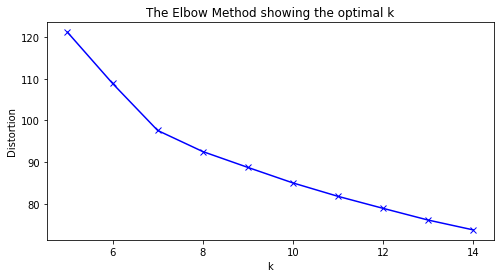

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
num_clusters = 7
test_model = KMeans(n_clusters=num_clusters)
test_model.fit(filt_df)
filt_df['Cluster'] = test_model.labels_
filt_df['Cluster'].value_counts()

0    982
4    878
5    839
2    738
3    676
1    622
6    442
Name: Cluster, dtype: int64

In [41]:
df['Cluster'] = test_model.labels_

In [42]:
for i in range(num_clusters):
    print("Cluster "+ str(i))
    print(list(df['Player'].loc[filt_df[filt_df['Cluster'] == i].head(15).index]))
    print()

Cluster 0
['Bogdan Bogdanovic', 'Marco Belinelli', 'Renaldas Seibutis', 'Ricky Rubio', 'Gregory Vargas', 'Francisco Cruz', 'Makoto Hiejima', 'Bruno Fitipaldo', 'Mateusz Ponitka', 'Jayson William', 'Pietro Aradori', 'Nando de Colo', 'Corey Webster', 'Carlos Morais', 'Evan Fournier']

Cluster 1
['Nestor Colmenares', 'Yanick Moreira', 'Renaldo Balkman', 'Joffrey Lauvergne', 'Eloy Vargas', 'Marcos Delia', 'Jan Vesely', 'Mohammad Hussein', 'Aron Baynes', 'Tuukka Kotti', 'Rudy Gobert', 'Gasper Vidmar', 'Jorge Bryan Diaz', 'Lior Eliyahu', 'June Mar Fajardo']

Cluster 2
['Andray Blatche', 'Dario Saric', 'Jonas Maciulis', 'Jianlian Yi', 'Makram Ben Romdhane', 'Ike Diogu', 'Mindaugas Kuzminskas', 'Eulis Baez', 'Ali Haidar', 'Georgios Printezis', 'Tornike Shengelia', 'Patrik Auda', 'Pavel Pumprla', 'Joji Takeuchi', 'Gabriel Deck']

Cluster 3
['Hector Hernandez', 'Luigi Datome', 'Shawn Huff', 'Robin Benzing', 'AndrÃ©s Nocioni', 'Peng Zhou', 'Reggie Moore', 'Ibrahim Djambo', 'Oshin Sahakian', 'Edo 

In [43]:
df.head()

,index,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,...,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off,Cluster
41,41,Bogdan Bogdanovic,352,167,96,94,31,1,34,31,...,0.173597,0.099792,0.097713,0.032225,0.001040,0.035343,0.032225,0.090437,0.071726,0
1,1,Luis Scola,0,122,105,19,304,167,125,97,...,0.127083,0.109375,0.019792,0.316667,0.173958,0.130208,0.101042,0.020833,0.001042,6
5,5,Facundo Campazzo,595,74,140,70,0,2,9,24,...,0.077164,0.145985,0.072993,0.000000,0.002086,0.009385,0.025026,0.016684,0.030240,4
151,151,Mantas Kalnietis,684,69,58,36,3,0,15,23,...,0.074114,0.062299,0.038668,0.003222,0.000000,0.016112,0.024705,0.020408,0.025779,4
1621,1621,Bojan Bogdanovic,205,119,113,149,124,2,39,22,...,0.136156,0.129291,0.170481,0.141876,0.002288,0.044622,0.025172,0.105263,0.010297,5


In [44]:
filt_df.groupby('Cluster').mean()

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
Cluster,,,,,,,,,,
0,0.421892,0.190771,0.126243,0.090510,0.015724,0.000938,0.026761,0.045545,0.052056,0.029562
1,0.002175,0.074129,0.066308,0.015913,0.177456,0.217994,0.209515,0.230872,0.004094,0.001543
2,0.018027,0.256992,0.102910,0.051232,0.179891,0.105409,0.113770,0.136904,0.029018,0.005849
3,0.053402,0.414415,0.130191,0.036365,0.053092,0.041090,0.080814,0.119666,0.056324,0.014641
4,0.597656,0.129466,0.087655,0.087529,0.006113,0.000273,0.012821,0.029786,0.023674,0.025027
5,0.218916,0.276576,0.156909,0.070078,0.030862,0.003935,0.047627,0.072047,0.090843,0.032206
6,0.002330,0.068263,0.054096,0.021539,0.372801,0.148298,0.152113,0.173375,0.006015,0.001169


In [54]:
s = df['Player'].value_counts()
names_to_keep = s[s >= 2].index

filt_df = df[df['Player'].isin(names_to_keep)]

intl_df = filt_df[filt_df['Source'] == 'INTL'].sort_values('Player')
fiba_df = filt_df[filt_df['Source'] == 'FIBA'].sort_values('Player')
if False in intl_df['Player'].values == fiba_df['Player'].values:
    print("Some names do not match!")
else:
    print("All names match! Ready to create confusion matrix.")

All names match! Ready to create confusion matrix.


In [55]:
fiba_df.shape

(568, 25)

In [56]:
intl_df.shape

(568, 25)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(intl_df['Cluster'].values, fiba_df['Cluster'].values)
pd.DataFrame(cm)

,0,1,2,3,4,5,6
0,59,0,0,1,30,16,0
1,0,38,10,0,0,0,11
2,1,4,61,14,0,3,3
3,3,0,15,32,0,12,0
4,26,0,0,0,91,0,0
5,14,0,3,10,1,48,0
6,0,11,3,0,0,0,48


In [58]:
import numpy as np
sum(np.diag(cm))/sum(sum(cm))

0.6637323943661971

In [59]:
fiba_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.246670
% Spot-Up              0.195804
% Transition           0.103456
% ISO                  0.056203
% Post-Up              0.104196
% P&R Roll Man         0.055712
% Cut                  0.076406
% Offensive Rebound    0.102137
% Off Screen           0.040057
% Hand Off             0.019359
dtype: float64

In [60]:
intl_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.241696
% Spot-Up              0.200776
% Transition           0.097725
% ISO                  0.052852
% Post-Up              0.111465
% P&R Roll Man         0.061181
% Cut                  0.077868
% Offensive Rebound    0.095336
% Off Screen           0.042882
% Hand Off             0.018219
dtype: float64

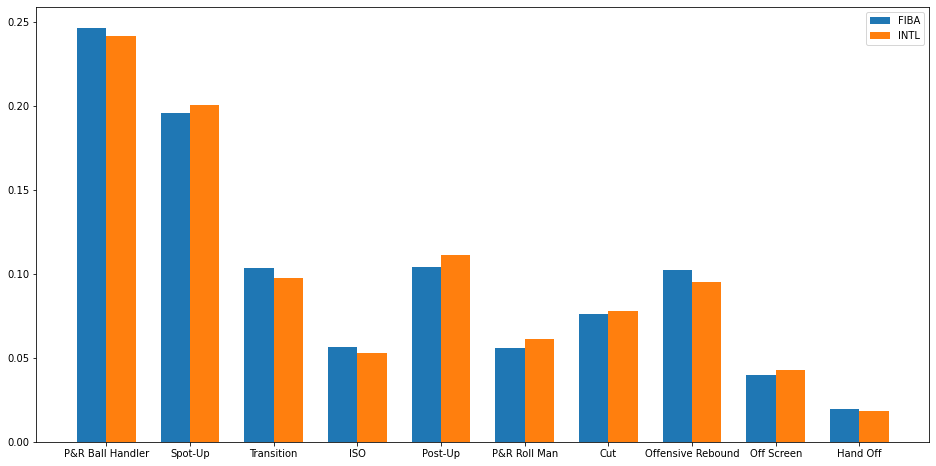

In [61]:
plt.figure(figsize = (16,8))
plt.bar([i for i in range(10)], fiba_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'FIBA')
plt.bar([i+0.35 for i in range(10)], intl_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'INTL')
plt.xticks([i+0.175 for i in range(10)], play_types)
plt.legend()
plt.show()

In [53]:
filt_df.groupby('Cluster')['Source'].value_counts()

Cluster  Source
0        INTL      106
         FIBA      103
1        INTL       59
         FIBA       53
2        FIBA       92
         INTL       86
3        INTL       62
         FIBA       57
4        FIBA      122
         INTL      117
5        FIBA       79
         INTL       76
6        FIBA       62
         INTL       62
Name: Source, dtype: int64